
# Lecture V: EXERCISES

----

## Exercise 1

Programm a script that creates a file containing the following message:
```
Hi!  
This is the last session of the python introductory course.  
We hope you have enjoyed it!
```
Afterwards, the programm must print the lines one by one, adding the line number at the beggining of them and the number of words of each one at the end.

#### Possible solution

In [1]:
fileHandle = open("file_1.txt", "w")
fileHandle.write("Hi!\n")
fileHandle.write("This is the last session of the python introductory course.\n")
fileHandle.close()

#Just to see how append mode works, not necessary:
fileHandle = open("file_1.txt", "a") 
fileHandle.write("We hope you have enjoyed it!\n")
fileHandle.close()

#Now we print the text.
fileHandle = open("file_1.txt", "r")
for i,line in enumerate(fileHandle):
    print(str(i) + " " + line[:-1] + " " + str(line.count(' ')+1) )

fileHandle.close()

0 Hi! 1
1 This is the last session of the python introductory course. 10
2 We hope you have enjoyed it! 6


Note that we have to use $\textit{line[:-1]}$ to avoid printing the jump-line character of each line, as the loop automatically prints line by line the text.

## Exercise 2

Create a script containing a function `file_coder()` that receives three parameters passed as input by the user: the name of both the file we we want to codify and the one we want to save the result in, in string format, and an integer number. 

The goal of this function is to codify the information in the input file and save the result in the output file, name of which will be passed as argument by the user. The method that you should use is the simple classical  $\textit{Caesar cipher}$, which consists of changing all characters by another one some fixed number of positions down the alphabet we are working with, in this case ASCII code. 

The script will have to make sure that the arguments are valid, so that they are in the corerct forma and making sure that exists such input file. If not, the programm will have to ask again for the arguments.

*Note*: Remember that in the end everything in your computer is saved as binarized numbers, 1-s or 0-s. As such, text or characters, must also be saved as numbers. The typical coding used to code each character of text into a number is the so called ASCII. For instance 'A' is saved as number 65, 'B' as 66 etc. You can find the dictionary bellow. In Python, in order to know the ASCII number for a character, say 'A' you can use the function `ord('A')`. On the other hand, if you need to convert an integer into its corresponding character, like 65 into 'A', you can use `ord(65)`.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/ASCII-Table-wide.svg/875px-ASCII-Table-wide.svg.png" alt="Drawing" style="width: 600px;"/>



#### Possible solution

Definition of function:

In [2]:
def file_coder(infile, n, outfile):
    infileHandle = open(infile, "r")
    outfileHandle = open(outfile, "w")
    
    for line in infileHandle:
        for char in line[:-1]:
            outfileHandle.write(chr(ord(char)+n))
        
        outfileHandle.write('\n')
    
    infileHandle.close()
    outfileHandle.close()

Function call:

In [3]:
name_of_infile = input("Enter input file name:")
num_pos = int(input("Enter number of positions:"))
name_of_outfile = input("Enter output file name:")

try:
    file_coder(infile = name_of_infile, n = num_pos, outfile = name_of_outfile)

except IOError:
    print("Input file not found.")

print("\nCoded file:\n")
with open(name_of_outfile, 'r') as reader:    
    print(reader.read())

Enter input file name:file_1.txt
Enter number of positions:3
Enter output file name:out.txt

Coded file:

Kl$
Wklv#lv#wkh#odvw#vhvvlrq#ri#wkh#s|wkrq#lqwurgxfwru|#frxuvh1
Zh#krsh#|rx#kdyh#hqmr|hg#lw$



## Exercise 3

Let's now use .npy files for plotting data points. To do so, choose a certain number of points to plot $N$, a float $\lambda$, say $\lambda=0.5$ and plot the function $f(x;\lambda)=sin(x/\lambda)$ for a certain range $x\in[x_{min},x_{max}]$. Supose that you are receiving the x points from a `.npy` file. Therefore, the script should firstly create a grid of pints (hint: you can use the code of tha last session) and write the full list in a  `.npy ` file. Secondly, read the x points where the function has to be evaluated and then plot the result.

#### Possible solution

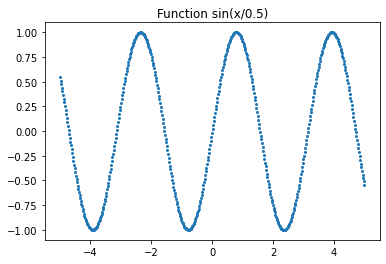

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#define the function
def f(x, L):
    return np.sin(x/L) 

# Choose the parameters
L=0.5
xmin=-5
xmax=5
N=500 # number of points to plot

# Generate the points, save them and load them.
x = np.linspace(xmin, xmax, num=N)
np.save('xdata.npy', x)
y = f(np.load('xdata.npy'), L = L)

#Plot of the results
plt.plot(x, y, 'o', linewidth=1.0, markersize=2)
plt.title(f'Function sin(x/{L})')
plt.show()

## Exercise 4

Create a function that extracts, from a text file containing many arrays, only one of them. This function will receive as parameters the name of the file containing the arrays and the i-th position of the desired one. 

Finally, the script should ask the user for a file name and a the line of the matrix to be extracted, calls the function and prints the result.

Repeat the problem, but working with a .npz file. The result should be the same.

Advice: Use a small N to avoid probblems with the .txt file, for example N = 5.

#### Possible solution

Creation of the file containing the data:

In [78]:
import numpy as np
np.set_printoptions(threshold=np.inf)

n = 5 #n rows and n cols
matrix = np.random.randint(low = 10, high = 99, size = (n,n)) #creation of a random n x n integer matrix

#For txt file
with open("data.txt","w") as fileHandle:
    fileHandle.write(str(matrix))

#For npz file
np.savez_compressed("data.npz",matrix)

Definition of the functions:

In [100]:
import numpy as np
def LoadRowTXT(file, line):
    try:
        with open(file,"r") as fileHandle: 
            row = np.array(fileHandle.readlines()[line][1:])
            return row

    except IOError:
        print("File not found or incorrect format. Try again.")
        

def LoadRowNPZ(file, line):
    try:
        row = np.load(file)['arr_0'][line]
        return row

    except IOError:
        print("File not found or incorrect format. Try again.")
        

Function calls:

In [103]:
line = int(input("Line to be extracted:"))
file_txt = input("Name of .txt file:")
file_npz = input("Name of .npz file:")

print("\nResults:\n")
row = LoadRowTXT(file_txt, line)
print(row)

row = LoadRowNPZ(file_npz, line)
print(row)

Line to be extracted:1
Name of .txt file:data.txt
Name of .npz file:data.npz

Results:

[72 68 89 82 75]

[72 68 89 82 75]


# Exercise 5: Creating a GIF animation using different Images

We acknowledged in the previous lecture's exercises that when simulations got heavy, trying to watch them live was problematic. Instead what we could do is to save all the frames generated by the simulation in a temporary directory, and only after the simulation has ended, generate an animation (say a `gif` "moving image") with a desired frame-rate.

Matplotlib itself has a way to generate animations efficiently. However, it is quite cumbersome for beginners. Instead there are some other libraries like `imageio` that provide us the most comfortable and direct solutions. For that, `imageio` has a function called `mimsave()`, which lets us input it a path for the output gif, a list of paths to the composing images for the animation (ordered as we want them to be ordered in the animation), and rather the number of frames per second to output or the duration of each frame in seconds (in case we want some frame to be shown for longer than the rest for instance).

For this you will first need to import the `imageio` library with `import imageio`. If your Anaconda distribution did not carry it already, you can install it with the following line in Jupyter:

`!pip install imageio`

or just `pip install imageio` in a terminal. (It turns out that if you write a `!` sign in front of a code line in Jupyter Notebook -not in a python script in general-, the next line will be executed in the underlying terminal that is interpreting the notebook!).

Then, as an example, if you have the following paths of images in a list `['image1.png', 'image2.png', './subfolder/image3.png']`, you can generate a gif called `my_animation.gif` as:

`imageio.mimsave('my_animation.gif', ['image1.png', 'image2.png', './subfolder/image3.png'], fps=1)`

which would generate a gif that has a length of 3 seconds, where we see only one frame per second. If instead we want each frame to have a certain length we can do:

`imageio.mimsave('my_animation.gif', ['image1.png', 'image2.png', './subfolder/image3.png'], duration=[2, 0.5, 1])`

The first frame will be shown for 2 seconds, then the second for half a second and third for a whole second (a total of 3.5 seconds).

**Exercise:** Take the Schrödinger Equation simulator from the previous lecture's exercises and generate the animation instead of showing the frames on screen (or do both). For this, create a directory where the execution is running, call it `temp`, and save the figures there (remember the `plt.savefig(path)` function to save plots to memory as images). When the simulator is done, run the gif generation, when it is done, remove all the images in the `temp` directory and remove the `temp` folder itself, all authomatically.

#### Possible Solution

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio

# User parameter declaration:

dt=0.000001
N=300
last_time=2
L=10.0
plotEvery=8000

def f(x, mu0=2.2, sigma=0.6, k0=0.0): # initially the particle will be a still gaussian distribution
    return (1/(np.pi*sigma**2))**(1/4)*np.exp(1j*k0*x-(x-mu0)**2/(2*sigma**2))

def V(x): # we will try a harmonic potential
    return 10*(x-(L/2))**2

In [28]:
def one_Quantum_Particle_in_1d_Simulator(dt, N, last_time, L, f, V, plotEvery, fps=10, dpi=150):
    # Create the temp folder to save the images
    os.makedirs("./temp/", exist_ok=True)
    image_paths = []
    
    # Define the Planck Constant and the mass of the particle
    hbar=1
    m=1
    
    # Compute the spatial grid width
    dx = L/N
    
    # Compute the x points
    x = np.array([ j*dx for j in range(0,N+1)])
    
    # Compute the potential energy in those points
    pot = np.array([ V(xk) for xk in x])
    
    # Initialize the psi array for the first iteration
    psi_0 = np.array([ f(xk) for xk in x])
    
    # Initialize the array psi for the next iterations as a zeros array
    psi_1 = np.zeros(psi_0.shape, dtype=np.complex) # note that the first and last positions are always 0
    
    # Initialize time counter
    t=0
    iteration=0
    print("Generating simulation plots...")
    
    while t<last_time:
        # update time
        iteration+=1
        t=iteration*dt
        
        # Compute the temperatures for this new time at each position of the grid
        # Note that we dont need to change the value of the boundaries
        psi_1[1:N] = (1-1j*dt/hbar*pot[1:N]-1j*dt*hbar/(m*dx**2))*psi_0[1:N] + 1j*hbar*dt/(2*m*dx**2)*( psi_0[2:] + psi_0[:(N-1)] )
        
        # You could also have done it using for loops instead of treating them as vectors,
        # but that will be slower to compute. Try it though, it's a good practice.
        
        # Now, let us plot this time iteration
        
        if(iteration%plotEvery==0):           
            new_image_path = f'./temp/schrodingerEvolution_time_{t}.png'
            plot_wavefunction_and_potential_and_save_it(psi_1, pot, x, t, N, dt, \
                            saving_path=new_image_path, dpi=dpi)
            image_paths.append(new_image_path)
            # print(f"Time {t:3.2}/{last_time} computed!")
            
        # Swap what we previously called previous iteration
        psi_0 = psi_1
    
    print("Generating GIF...")
    images_for_animation = [ imageio.imread(image_path) for image_path in image_paths]
    imageio.mimsave('Schrodinger_Eqt_Simul.gif', images_for_animation, fps=fps)
    
    print("Erasing mess...")
    for image_path in image_paths:
        os.remove(image_path)
    os.rmdir('./temp/')
    print("\nDone!!")
    
        
def plot_wavefunction_and_potential_and_save_it(psi, pot, x, t, N, dt, saving_path, dpi):
    # Compute the probability density
    probability = np.abs(psi)**2

    # Clear previous plots
    plt.clf()
    
    # Plot
    plt.plot(x, probability, '-', label=f'Probability(x,time={round(t,4)})', markersize=1.5) # plot the probability
    plt.plot(x, np.real(psi), '-', label=f'Real part', markersize=1.5) # plot the real part
    plt.plot(x, np.imag(psi), '-', label=f'Imaginary Part', markersize=1.5) # plot the imaginary part

    plt.ylim(-1.6,1.6)
    plt.xlabel('Position x')
    plt.ylabel('Probability Density |psi|**2')
    plt.legend()

    # In order to have the potential energy in a differnet y axis we use twinx
    plt.twinx()
    plt.plot(x, pot, '-', label=f'Potential Energy', markersize=1, color='grey') # plot the potential
    plt.ylabel('Potential Energy')

    plt.legend() # to show the labels of the plots
    plt.title(f'Time Evolution for Quantum Particle using\n N={N} points in space and time step dt={dt}')

    plt.savefig(saving_path, dpi=dpi) # choose the resolution of the images with dpi


Generating simulation plots...
Generating GIF...
Erasing mess...

Done!!


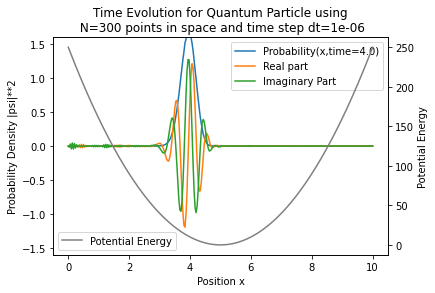

In [29]:
one_Quantum_Particle_in_1d_Simulator(dt, N, last_time, L, f, V, plotEvery)

# Exercise 6: Cool 3 Body Simulation Initial Conditions

As you could verify testing different initial conditions in the last lecture's exercises it is hard to find harmonious configurations. However, this is still today an active field of research (looking for solutions of the three body problem of classical Newtonian gravity and their stability). In the following page, its author gives us some datasets with specially interesting initial conditions with their names and authors, even links to the original papers:

https://observablehq.com/@rreusser/periodic-three-body-initial-conditions

We have downloaded one of them in a so called `json` format. This is a very standard format for datasets to be used in multiple programming languages. In python thjey can be read as dictionaries using the `json` library. In order to load a `json` file's content to a Python dictionary, after importing the `json` library, we can use the function `load`. For this, we must first open the file in read mode, get its file-handle and give it to the function, like this:

    input_file = open("myfile.json", "r")

    data_dictionary = json.dump(input_file)

    input_file.close()

And then the data will be in `data_dictionary`. In fact if you open the `.json` file with a text reader directly, you will notice that it has exactly the shape of a python dictionary! This is not just a coincidence obviously.

If we wanted to dump a dictionary to a json file we could do instead:

    out_file = open("myfile.json", "w")

    json.dump(my_dictionary, out_file)

    out_file.close()
    
For more details you can surf the net.

Now, download the `threeBodyInitialConditions.json` file we have uploaded for this lecture and open it in dictionary form by first doing `import json`. Look at its structure, it is a dictionary of dictionaries. Roughly it is classified by researchers, then the name of the initial condition type, then the mode, and then there is the information of the initial conditions: a link to a credit page, the discovery year etc., but most importantly for us, the initial x and v coordinates.

**Exercise**: First similar to Exercise 5, make a GIF generating version of the N body simulator of the previous lecture's exercises. Then, import the `json` and make a menu (using prints and inputs) showing the user the possible authors, condition types and modes in the dictionary and allowing her/him to choose the the desired mode. Then the code should run the simulator with those conditions and output the gif.

Note that these $N=3$ body initial conditions are given for 2D simulations, and ours are 3D. That is, they are given as `'x' : [[1.5, 0], [0.4, 0.5], [0.1, 0.3]]`, which means we need to add an extra collumn (with zeros for example) for our simulations.

Also, note that these initial conditions are so refined that many are quite unstable, which means that numerical error will build up fast. Therefore, with our so simple method to solve the differential equaiton you will need to put the time step $\Delta t$ veery small to see harmonious results!

### Possible Solution for the Generation of GIFs with the N Body simulator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import imageio
import os

def run_N_Body_simulator(N, positions_now, velocities_now, masses, additional_parameters,
                    force_list, t0, tf, timeIts, plotEvery, limits, J_trace, exp_name="", dpi=150, fps=10):
    os.makedirs("./temp", exist_ok=True)
    image_paths= []
    
    # Compute the times in which the simulator will compute a step:
    times = np.linspace(start=t0, stop=tf, num=timeIts)
    # Get time increment delta t
    dt = times[1]-times[0]
    
    positions = np.zeros((J_trace, positions_now.shape[0], positions_now.shape[1]))
    positions[:] = positions_now # copy the same position in all J
    
    print("Generating images...")
    for it, t in enumerate(times):
        # a Nx3 array (matrix) where we will save the forces in each time
        forces = np.zeros(positions_now.shape)
    
        # Step 1, compute the total force on each particle
        for k, xk in enumerate(positions[0]):
            for j, xj in enumerate(positions[0]): # each of the other particles
                if j!=k: # does not self-interact!
                    for force in force_list:
                        forces[k,:] += force(xk, xj, masses[k], masses[j], additional_parameters[k], additional_parameters[j])
        
        # Step 2, compute the velcity in the next time
        velocities_next = velocities_now + forces*dt
        
        # Step 3, compute the position of the particles in the next time
        # first move all the positions one step onward
        positions[1:, :, :] = positions[:-1,:,:] # copy in the slots from 1 to J the ones that were in 0 to J-1
        
        positions[0,:,:] = positions[1,:,:] + velocities_now*dt
        
        # Plot the particles
        if it%plotEvery==0:
            output_image_path = f"./temp/NBody_it_{it}.png"
            plot_N_particles_and_save_it(output_image_path, positions, velocities_next, t,
                             limits['xmin'], limits['xmax'], limits['ymin'],
                             limits['ymax'], limits['zmin'], limits['zmax'], dpi=dpi, fps=fps)
            image_paths.append(output_image_path)
        
        # prepare for the next time iteration
        velocities_now = velocities_next
        # for the position it is already prepared
    
    print("Generating GIF...")
    images_for_animation = [ imageio.imread(image_path) for image_path in image_paths]
    imageio.mimsave(f'NBody_Simulation_{exp_name}.gif', images_for_animation, fps=fps)
    
    print("Erasing mess...")
    for image_path in image_paths:
        os.remove(image_path)
    os.rmdir('./temp/')
    print("\nDone!!")
    

def plot_N_particles_and_save_it(output_image_path, positions, velocities, t,
                                 xmin=-1, xmax=1, ymin=-1, ymax=1, zmin=-1, zmax=1, dpi=150, fps=10):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    cmap = matplotlib.cm.get_cmap('hsv') # to have the same colors of th trace and the body
    
    # Plot particles
    ax.scatter3D(positions[0,:,0], positions[0,:,1], positions[0,:,2], 
                 c=cmap(np.arange(positions.shape[1])/positions.shape[1]), s=50)
    
    # plot velocity vectors
    ax.quiver(positions[0,:,0], positions[0,:,1], positions[0,:,2], 
              velocities[:,0], velocities[:,1], velocities[:,2], length=0.2, normalize=True)
    
    
    # plot the traces
    for j in range(positions.shape[1]): # for each particle its trace separately
        ax.plot3D(positions[:,j,0], positions[:,j,1], positions[:,j,2], '-', c=cmap(j/positions.shape[1]) )
    
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    ax.set_zlim((zmin, zmax))
    ax.set_title(f"{positions.shape[1]} Body simulation time t={t:4.3}")

    plt.savefig(output_image_path, dpi=dpi) # choose the resolution of the images with dpi
    # Clear figure
    plt.close(fig)

### Possible Menu solution for the user to choose the desired initial conditions for the 3 body problem

In [2]:
import json

with open("threeBodyInitialConditions.json", 'r') as file:
    initial_conds = json.load(file)
    

def ask_user_return_x_v_initial_conditions(initial_conds):
    print("Authors:\n")
    for i, author in enumerate(initial_conds.keys()):
        print(f"({i}) {author}")
    author = list(initial_conds.keys())[int(input("Choose the Author number:"))]

    print("\nConditions:\n")
    for i, cond in enumerate( initial_conds[author].keys()):
        print(f"({i}) {cond}")
    condition = list(initial_conds[author].keys())[int(input("Choose the Condition type:"))]

    print("\nMode:\n")
    for i, mode in enumerate( initial_conds[author][condition].keys()):
        print(f"({i}) {mode}")
    mode = list(initial_conds[author][condition].keys())[int(input("Choose the Mode:"))]
    
    selected_condition_dict = initial_conds[author][condition][mode]
    
    x = np.concatenate( (np.array( selected_condition_dict['x'] ), np.array([[0],[0],[0]])), axis=1 )
    v = np.concatenate( (np.array( selected_condition_dict['v'] ), np.array([[0],[0],[0]])), axis=1 )
    return x,v, f"{condition}_{mode}_{author}"

In [8]:
def gravity_force_on_particle_1_by_2(x1, x2, m1, m2, q1, q2, G=1.0):
    '''
    x1 and x2 are expected to be arrays of 3 elements (1 dimension) or 3x1 or 1x3 
    It returns a 3 element array back (the force vector)
    '''
    unit_vector = (x2-x1)/np.linalg.norm(x2-x1) # pointing from particle 1 to 2
    return (G*m1*m2/( np.linalg.norm(x2-x1)**2 ))*unit_vector

x, v, exp_name = ask_user_return_x_v_initial_conditions(initial_conds)
run_N_Body_simulator(N=3, positions_now=x, velocities_now=v,
                    masses=[1, 1, 1], 
                    additional_parameters=[0, 0, 0], 
                    force_list=[gravity_force_on_particle_1_by_2],
                    t0=0, tf=12, timeIts=40000, plotEvery=1000,
                     limits={'xmin':-1.5, 'xmax':1.5, 'ymin':-1.5, 'ymax':1.5, 'zmin':-1.5, 'zmax':1.5},
                     J_trace=50000, exp_name=exp_name, fps=7, dpi=70)

# Try for example (0) Šuvakov -> (3) IVa - Moth I -> (0)

Authors:

(0) Šuvakov
(1) Li & Liao Equal Mass
(2) Li & Liao Unequal Mass
(3) Li & Liao Free-fall
(4) Hristov et al.
Choose the Author number:0

Conditions:

(0) I - Butterfly I
(1) II - Dragonfly
(2) III - Yin Yang
(3) IVa - Moth I
(4) IVb - Butterfly III
(5) IVc - Moth III
(6) V - Figure 8
(7) VI - Yarn
(8) VIIa - Moth
(9) VIIb - Moth
(10) VIII - Other
(11) Broucke
(12) Sheen
Choose the Condition type:3

Mode:

(0) IVa.2.A
(1) IVa.4.A
(2) IVa.8.G
(3) IVa.8.H
(4) IVa.8.I
(5) IVa.8.J
(6) IVa.8.K
(7) IVa.9.A
(8) IVa.9.B
(9) IVa.10.A
(10) IVa.10.B
(11) IVa.11.A.α
(12) IVa.4.B
(13) IVa.11.A.β
(14) IVa.11.B
(15) IVa.12.A
(16) IVa.12.B
(17) IVa.12.C
(18) IVa.12.D
(19) IVa.12.E
(20) IVa.13.A
(21) IVa.13.B
(22) IVa.13.C
(23) IVa.6.A
(24) IVa.14.A
(25) IVa.14.B
(26) IVa.14.C
(27) IVa.14.D
(28) IVa.15.A
(29) IVa.15.B
(30) IVa.16.A
(31) IVa.8.A
(32) IVa.8.B
(33) IVa.8.C
(34) IVa.8.D
(35) IVa.8.E
(36) IVa.8.F
Choose the Mode:0
Generating images...
Generating GIF...
Erasing mess...

Done!!
